In [ ]:
# Task 1: Import necessary libraries and load the dataset.

In [1]:

import pandas as pd
import plotly.express as px

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"  
df = pd.read_csv(url)

# Display the first few rows of the dataset to inspect the data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Task 2: Create a bar plot to visualize the number of passengers who survived and did not survive, broken down by gender.

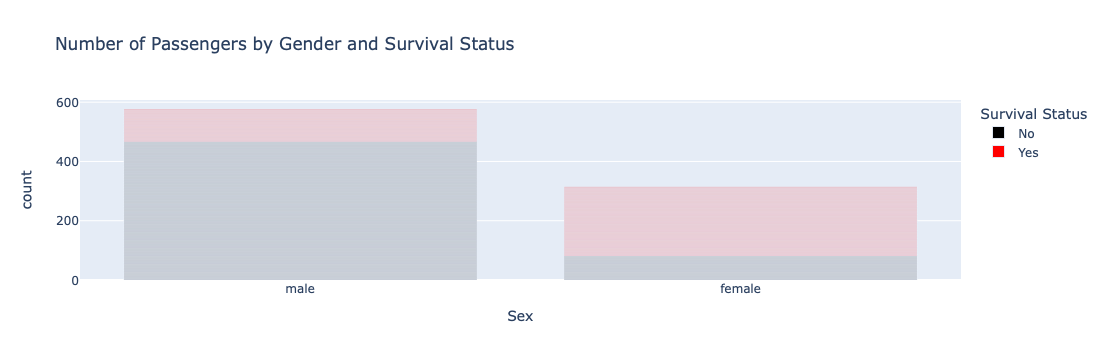

In [4]:

# Survived' codes to meaningful labels
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'})

# Create bar plot using Plotly Express
fig = px.bar(df, x='Sex', color='Survived', labels={'Survived': 'Survival Status'},
             title='Number of Passengers by Gender and Survival Status',
             category_orders={'Sex': ['male', 'female']},
             color_discrete_map={'No': 'black', 'Yes': 'red'})
fig.show()


In [ ]:
# Task 3: Create a histogram to display the distribution of passengers' ages. Use different colors for passengers who survived and did not survive.

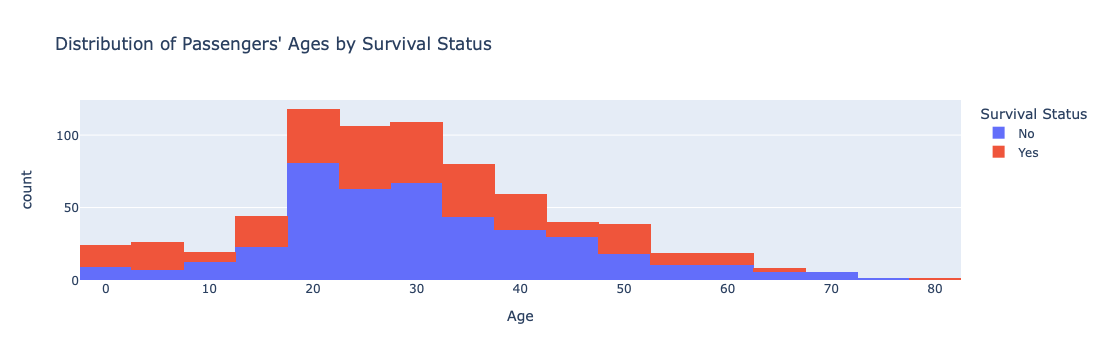

In [5]:

histogram = px.histogram(df, x='Age', color='Survived', nbins=30,
                         labels={'Age': 'Age', 'count': 'Count', 'Survived': 'Survival Status'},
                         title='Distribution of Passengers\' Ages by Survival Status')

# Show the plot
histogram.show()


In [ ]:
# Task 4: Create a violin plot to visualize the distribution of fare prices paid by passengers, broken down by their class (1st, 2nd, and 3rd class).

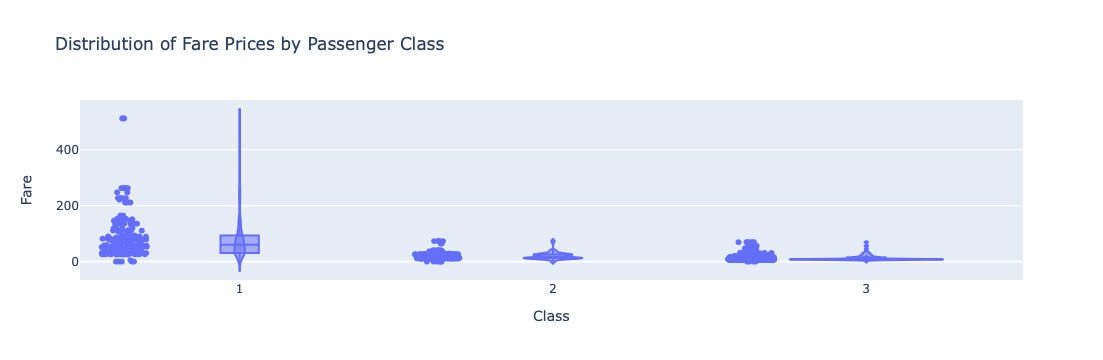

In [6]:

violin_plot = px.violin(df, x='Pclass', y='Fare', box=True, points='all',
                        labels={'Pclass': 'Class', 'Fare': 'Fare'},
                        title='Distribution of Fare Prices by Passenger Class')

# Show the plot
violin_plot.show()


In [ ]:
# Task 5: Generate a scatter plot to explore the relationship between passengers' ages and fare prices, using different colors and symbols for the different classes.

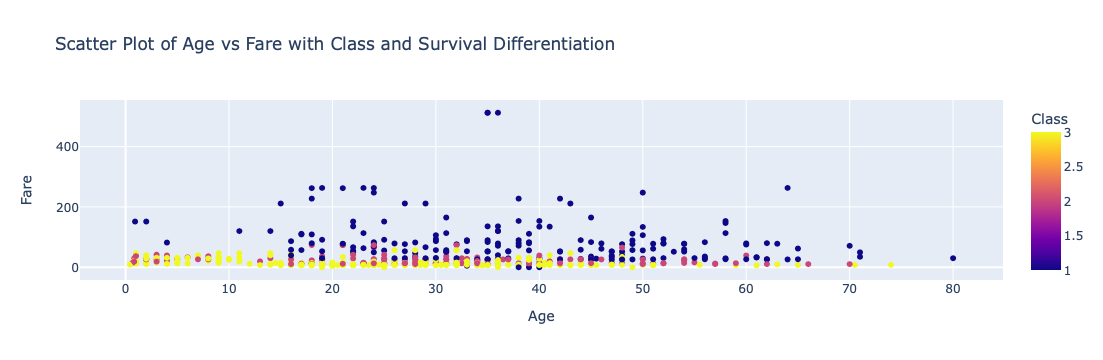

In [11]:

scatter_plot = px.scatter(df, x='Age', y='Fare', color='Pclass', size_max=10,
                          labels={'Age': 'Age', 'Fare': 'Fare', 'Pclass': 'Class', 'Survived': 'Survival Status'},
                          title='Scatter Plot of Age vs Fare with Class and Survival Differentiation')

# Show the plot
scatter_plot.show()


In [ ]:
#Task 6 : create a scatter plot matrix displaying the relationship between age, fare, and class for passengers who survived and did not survive

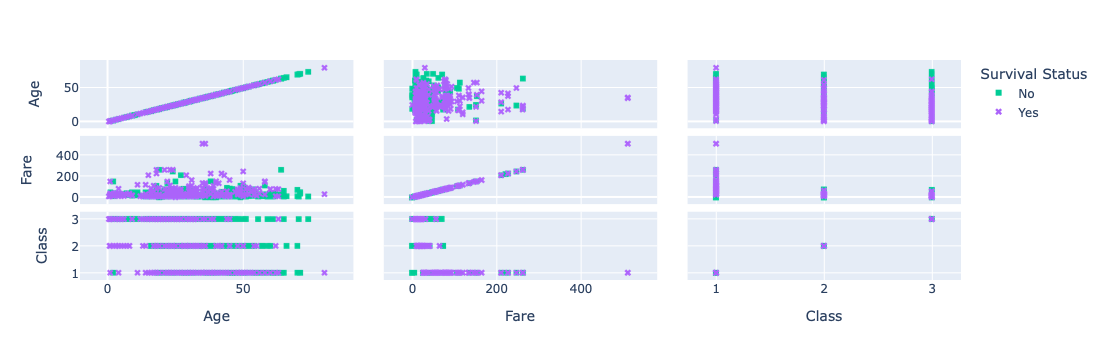

In [18]:
pd.DataFrame.iteritems = pd.DataFrame.items
scatter_matrix = px.scatter_matrix(df, dimensions=['Age', 'Fare', 'Pclass'], color='Survived',
                                   category_orders={'Survived': [0, 1]},
                                   labels={'Survived': 'Survival Status', 'Age': 'Age', 'Fare': 'Fare', 'Pclass': 'Class'},
                                   symbol='Survived', size_max=10)

# Show the plot
scatter_matrix.show()


In [ ]:
#Export your final visualizations as HTML files to share with others.

In [21]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Create subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Bar Plot', 'Histogram', 'Violin Plot', 'Scatter Plot'])

# Add individual plots to subplots
fig.add_trace(bar_plot['data'][0], row=1, col=1)
fig.add_trace(histogram['data'][0], row=1, col=2)
fig.add_trace(violin_plot['data'][0], row=2, col=1)
fig.add_trace(scatter_plot['data'][0], row=2, col=2)

# Update layout for better visualization
fig.update_layout(title='Combined Visualizations', showlegend=False)

# Save the combined plot as HTML
fig.write_html('combined_visualizations.html')

# Save scatter_matrix as a separate HTML file
scatter_matrix.write_html('scatter_matrix.html')
